<a href="https://colab.research.google.com/github/brunobobadilla06/Analisis-de-Ventas/blob/main/Analisis_de_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

# Leer el archivo csv
df = pd.read_csv('https://raw.githubusercontent.com/brunobobadilla06/Analisis-de-Ventas/refs/heads/main/ventas_tecnologia_ecommerce.csv')

# Covertir la fecha en formato fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Crear nuevas columnas derivadas
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['MesNombre'] = df['Fecha'].dt.strftime('%B')
df['Dia'] = df['Fecha'].dt.day

# Verificar valores nulos

print('\n', df.isnull().sum())
# Eliminar duplicados si los hubiera
df = df.drop_duplicates()

# Reaordenar columnas
df = df[['Fecha', 'Año', 'Mes', 'MesNombre', 'Dia', 'Producto', 'Categoría', 'PrecioUnitario', 'Cantidad', 'TotalVenta', 'Región', 'Vendedor', 'Canal']]

# Mostrar las primeras filas
df.head()



# Ventas totales y promedio
print('\nVentas promedio:', round(df['TotalVenta'].mean(), 2))
print('\nVentas totales:', round(df['TotalVenta'].sum(), 2))

# Ventas por Categoria
ventas_categoria = df.groupby('Categoría')['TotalVenta'].sum().sort_values(ascending=False)
print('\nVentas por categorias: ', ventas_categoria)

#Ventas por canal, online vs tienda fisica
ventas_canal = df.groupby('Canal')['TotalVenta'].sum()
print('\nVentas por canal: ', ventas_canal)

#Ventas por region y vendedor
ventas_region = df.groupby('Región')['TotalVenta'].sum()
ventas_vendedor = df.groupby('Vendedor')['TotalVenta'].sum()
print('\nVentas por region: ', ventas_region)
print('\nVentas por vendedor: ', ventas_vendedor)

#Productos mas vendidos
productos_mas_vendidos = df.groupby('Producto')['Cantidad'].sum().sort_values(ascending=False)
print('\nProductos mas vendidos: ', productos_mas_vendidos)


 Fecha             0
Producto          0
Categoría         0
PrecioUnitario    0
Cantidad          0
TotalVenta        0
Región            0
Vendedor          0
Canal             0
Año               0
Mes               0
MesNombre         0
Dia               0
dtype: int64

Ventas promedio: 1405.75

Ventas totales: 33738.0

Ventas por categorias:  Categoría
Celulares       8100.4
Computadoras    8036.1
Tablets         7753.4
Wearables       5715.1
Audio           2805.2
Periféricos     1327.8
Name: TotalVenta, dtype: float64

Ventas por canal:  Canal
Online           23970.8
Tienda Física     9767.2
Name: TotalVenta, dtype: float64

Ventas por region:  Región
Centro     7903.4
Este       4961.1
Norte      4199.9
Oeste      5668.5
Sur       11005.1
Name: TotalVenta, dtype: float64

Ventas por vendedor:  Vendedor
Andrés     2524.4
Julieta    2308.6
Lucas      4123.9
Lucía      6013.9
Martín     4527.2
María      5135.0
Sofía      5514.0
Tomás      3591.0
Name: TotalVenta, dtype: float64

/tmp/ipython-input-3240844521.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_categoria.values, y=ventas_categoria.index, palette='viridis')


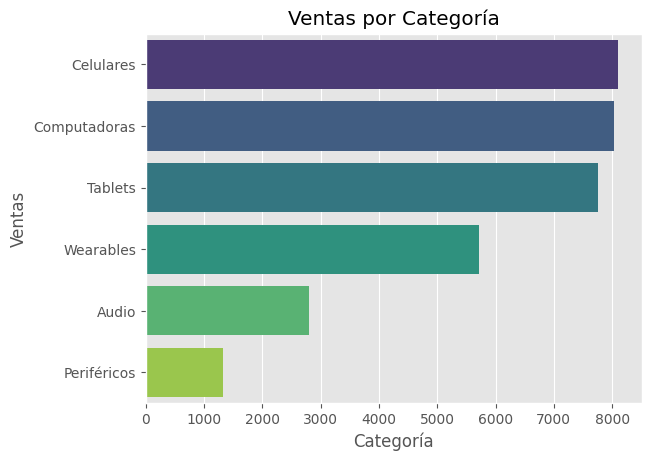

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
plt.style.use('ggplot')

#Ventas por categoria
sns.barplot(x=ventas_categoria.values, y=ventas_categoria.index, palette='viridis')
plt.title('Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.show()